Introduction and importing dependencies

In [1]:
!pip install --upgrade pip setuptools
!pip install tensorflow opencv-python matplotlib
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.1/931.1 kB 53.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 70.2.0
    Uninstalling setuptools-70.2.0:
      Successfully uninstalled setuptools-70.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.1
    Uninstalling pip-24.1.1:
      Successfully uninstalled pip-24.1.1
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install --upgrade opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#importing tensor flow Dependencies - Functional API
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten


/Users/adarshkatigi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
#Limiting GPU Memory consumption growth so we do not run into out of memory exeption/error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.set_memory_growth(gpu, True)

#List of All available GPUs(Currently list of GPUs is empty because my laptop does not come with any built-in GPU)
gpus

[]

In [6]:
#Defining Folder Structures
POS_PATH = os.path.join('data','positive')
NEG_PATH = os.path.join('data','negative') 
ANC_PATH = os.path.join('data','anchor')

In [7]:
# #Creating the required directories
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

Unpacking Labelled Faces, Collecting Anchor/ Positive Images

In [8]:
import uuid

In [9]:
def print_available_video_capture_devices(max_devices=10):
    available_devices = []
    for device_index in range(max_devices):
        cap = cv2.VideoCapture(device_index)
        if cap.isOpened():
            print(f"Device {device_index} is available.")
            available_devices.append(device_index)
            cap.release()
        else:
            print(f"Device {device_index} is not available.")
    return available_devices

available_devices = print_available_video_capture_devices()

Device 0 is available.
Device 1 is available.
[07/11 23:40:00.615359][info][9601][Context.cpp:69] Context created with config: default config!
[07/11 23:40:00.615401][info][9601][Context.cpp:74] Context work_dir=/Users/adarshkatigi/Desktop/Projects/Face_Recognition
[07/11 23:40:00.615403][info][9601][Context.cpp:77] 	- SDK version: 1.9.4
[07/11 23:40:00.615405][info][9601][Context.cpp:78] 	- SDK stage version: main
[07/11 23:40:00.615408][info][9601][Context.cpp:82] get config EnumerateNetDevice:false
[07/11 23:40:00.615579][info][9601][MacPal.cpp:36] createObPal: create MacPal!
[07/11 23:40:00.623233][info][9601][MacPal.cpp:104] Create PollingDeviceWatcher!
[07/11 23:40:00.623241][info][9601][DeviceManager.cpp:15] Current found device(s): (0)
[07/11 23:40:00.623386][info][9601][Pipeline.cpp:15] Try to create pipeline with default device.
[07/11 23:40:00.623391][warning][9601][ObException.cpp:5] No device found, fail to create pipeline!
[07/11 23:40:00.625857][info][9601][Context.cpp:9

OpenCV: out device of bound (0-1): 2
OpenCV: camera failed to properly initialize!
[ WARN:0@17.854] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!


OpenCV: out device of bound (0-1): 3
OpenCV: camera failed to properly initialize!
[ WARN:0@17.870] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!


OpenCV: out device of bound (0-1): 4
OpenCV: camera failed to properly initialize!
[ WARN:0@17.884] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!


OpenCV: out device of bound (0-1): 5
OpenCV: camera failed to properly initialize!
[ WARN:0@17.898] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!


OpenCV: out device of bound (0-1): 6
OpenCV: camera failed to properly initialize!
[ WARN:0@17.912] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!


OpenCV: out device of bound (0-1): 7
OpenCV: camera failed to properly initialize!
[ WARN:0@17.927] global cap.cpp:323 open V

In [10]:
# We establish a connection to the webcam
cap = cv2.VideoCapture(0)

# Looping through every single frame in the webcam
while cap.isOpened():   
    # Return value is boolean and tells us if the video capture device is working
    # Frame returns the current frame as an image
    ret, frame = cap.read()

    frame = frame[200:200+400, 700:700+500, :]

    #Collecting Anchors
    if cv2.waitKey(1) & 0xFF == ord('a'):
        #Creating unique name/filepath
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Write the anchor image to the path
        cv2.imwrite(imgname, frame)
    #Collecting Positives
    if cv2.waitKey(1) & 0xFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Write the anchor image to the path
        cv2.imwrite(imgname, frame)
        
    # Renders the returned frame in a window on the screen titled 'Image Captured'
    cv2.imshow('Image Captured', frame)
    
    # If the 'q' key is pressed then the system exits the current running window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Exiting....")
        break
    
# Release the webcam
cap.release()
# Destroy the specific window
cv2.destroyWindow('Image Captured')
# Ensure all windows are closed
cv2.destroyAllWindows()
print("Webcam released and all related windows closed")

2024-07-11 23:40:01.434 Python[1137:9601] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


Exiting....
Webcam released and all related windows closed


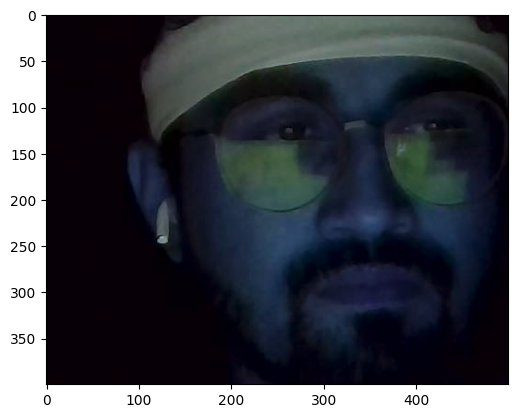

In [11]:
plt.imshow(frame)

In [12]:
#Fetching the image directories
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [13]:
ANC_PATH+'/*.jpg'

'data/anchor/*.jpg'

In [14]:
dir_test = anchor.as_numpy_iterator()

In [15]:
print(dir_test.next())

b'data/anchor/dfd2a736-1ea6-11ef-8d16-be8281faaadb.jpg'


In [16]:
#image preprocessing function
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img) #load in the image using the decode method
    #Preprocessing steps
    img = tf.image.resize(img, (100, 100))#resizing image to be 100pX100pX3channels
    img = img/255.0 #Normalization
    return img

In [17]:
img = preprocess('data/anchor/dc84ffdc-1ea8-11ef-8d16-be8281faaadb.jpg')

In [18]:
#Printing the scale of the darkest to the lightest pixel
#Usually min() = 0 because the darkest pixel is black
#max() value is the lightest pixel . Here there is no field of white so the vlaue is slightly less than 1
print(img.numpy().min())
print("to")
print(img.numpy().max())

0.0
to
0.9884804


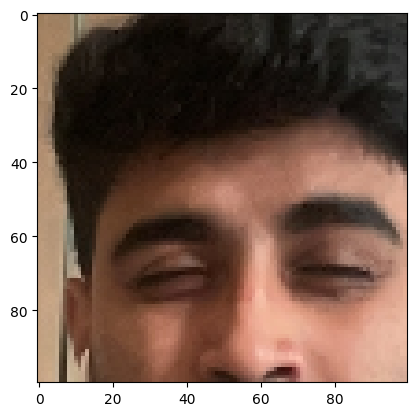

In [19]:
plt.imshow(img)

Creating Labelled Dataset

In [20]:
#(anchor, positive) => 1,1,1,1,1
#(anchor, negative) => 0,0,0,0,0

In [21]:
positives = tf.data.Dataset.zip(anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))
negatives = tf.data.Dataset.zip(anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor))))
data=positives.concatenate(negatives)

In [22]:
samples = data.as_numpy_iterator()

In [23]:
example = samples.next()

In [24]:
example

(b'data/anchor/ef9fb31a-1ea7-11ef-8d16-be8281faaadb.jpg',
 b'data/positive/6bd158e4-1ea8-11ef-8d16-be8281faaadb.jpg',
 1.0)

Train test partitioning

In [25]:
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label)

In [26]:
res = preprocess_twin(*example)

In [27]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.35318628, 0.23946078, 0.16887255],
        [0.35441175, 0.23088235, 0.15931372],
        [0.3754902 , 0.24019608, 0.16568628],
        ...,
        [0.24558823, 0.25343138, 0.23382352],
        [0.21936275, 0.22720589, 0.20759805],
        [0.21544118, 0.23504902, 0.21151961]],

       [[0.34362745, 0.23382352, 0.15147059],
        [0.35833332, 0.23480392, 0.15735294],
        [0.36519608, 0.22990195, 0.15465686],
        ...,
        [0.24068627, 0.2492647 , 0.22818628],
        [0.2365196 , 0.24436274, 0.2247549 ],
        [0.21568628, 0.23529412, 0.21176471]],

       [[0.35245097, 0.24264705, 0.16029412],
        [0.37034315, 0.24754901, 0.16862746],
        [0.3767157 , 0.24215686, 0.16323529],
        ...,
        [0.21544118, 0.22254902, 0.19779412],
        [0.25661764, 0.26519608, 0.24411765],
        [0.2379902 , 0.24877451, 0.22818628]],

       ...,

       [[0.50147057, 0.41911766, 0.34460783],
        [0.52

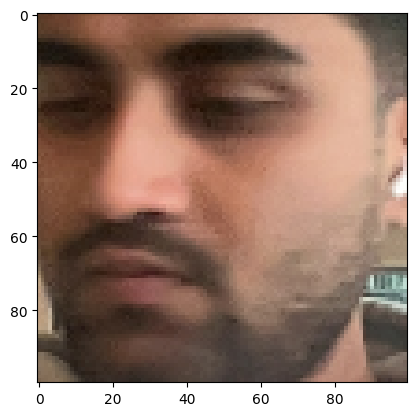

In [28]:
plt.imshow(res[0])

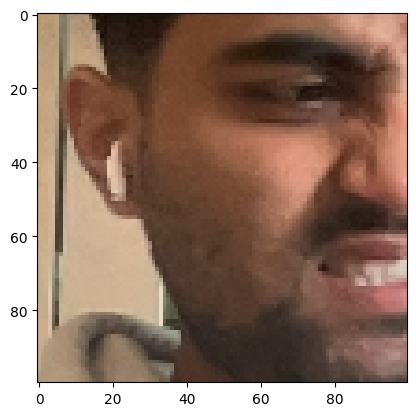

In [29]:
plt.imshow(res[1])

In [30]:
res[2]

1.0

In [31]:
#Building a data loader pipeline
data = data.map(preprocess_twin)
data = data.cache()
#Shuffling so that we do not have one type of images when we train and all the 3 classes of images appear random
data = data.shuffle(buffer_size=1024)

In [32]:
samples = data.as_numpy_iterator()

In [33]:
samp = samples.next()

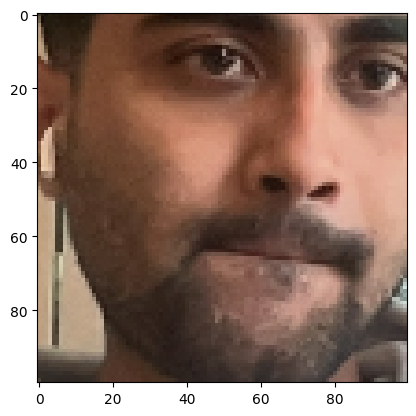

In [34]:
plt.imshow(samp[0])

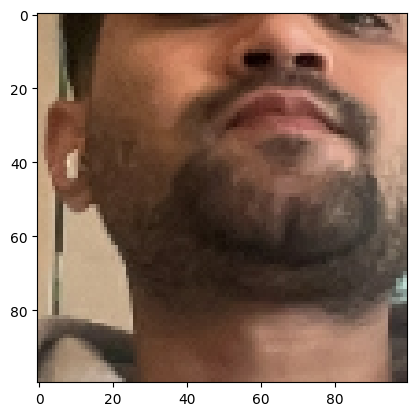

In [35]:
plt.imshow(samp[1])

In [36]:
samp[2]

1.0

In [51]:
samp1 = samples.next()

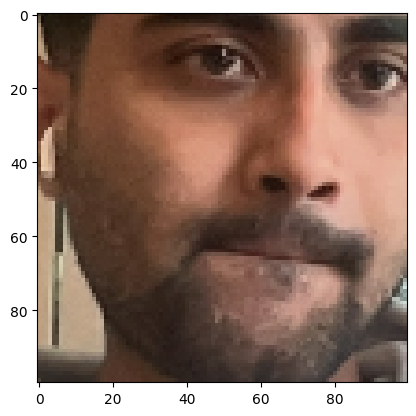

In [38]:
plt.imshow(samp[0])

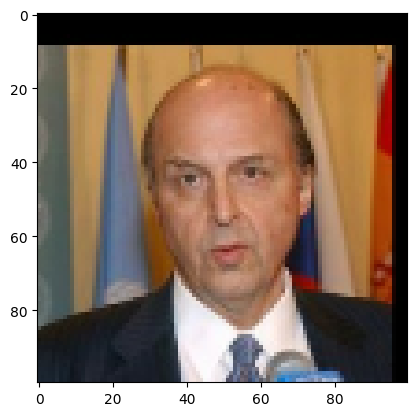

In [52]:
plt.imshow(samp1[1])

In [53]:
samp1[2]

0.0

In [41]:
#Training Partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [42]:
#Test Partition
test_data = data.skip(round(len(data)*.7))
test_data = data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

**Model Engineering**

In [43]:
inp = Input(shape=(105,105,3), name = 'input_image')

In [44]:
c1 = Conv2D(64,(10,10), activation='relu')(inp)
m1 = MaxPooling2D(64,(2,2), padding = 'same')(c1)

#Second set of Layers
c2 = Conv2D(128,(7,7), activation = 'relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

#Third set of layers
c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
m3 = MaxPooling2D(64,(2,2), padding = 'same')(c3)

#Fourth set of Layers
c4 = Conv2D(256, (4,4), activation = 'relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation = 'sigmoid')(f1)

In [45]:
d1

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_8>

In [46]:
mod = Model(inputs=[inp], outputs=[d1],name='embedding')

In [47]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 105, 105, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 96, 96, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
def make_embedding():
    inp = Input(shape=(100,100,3), name = 'input_image')
    
    #First set of layers
    c1 = Conv2D(64,(10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64,(2,2), padding = 'same')(c1)
    
    #Second set of Layers
    c2 = Conv2D(128,(7,7), activation = 'relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    #Third set of layers
    c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
    m3 = MaxPooling2D(64,(2,2), padding = 'same')(c3)

    #Fourth set of Layers
    c4 = Conv2D(256, (4,4), activation = 'relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation = 'sigmoid')(f1)
    
    return Model(inputs=[inp], outputs=[d1],name='embedding')
    

In [85]:
embedding = make_embedding()

In [86]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
        
    
    def call(self , input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [88]:
l1 = L1Dist()

#Visualization

In [89]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validaion_img', shape=(100,100,3))

In [97]:
inp_embedding = tf.keras.Input(shape=(4096,), name="inp_embedding")
val_embedding = tf.keras.Input(shape=(4096,), name="val_embedding")

In [98]:
siamese_layer=L1Dist()

In [102]:
distances=siamese_layer(inp_embedding, val_embedding)

In [104]:
classifier=Dense(1,activation='sigmoid')(distances)

In [105]:
classifier

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_66>

In [106]:
def make_siamese_model():
    #Anchor image in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    #Validation image in the network
    validation_image = Input(name='validaion_img', shape=(100,100,3))
    
    siamese_layer=L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    #Classification Layer
    classifier = Dense(1, activation='sigmoid')(distances)
    
    
    return Model(inputs=[input_image,validation_image],outputs=classifier,name='Siamese Network')